In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime
import requests

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-79.16828396613673 7.732276944061454
-19.00867643555567 -90.96400162696213
-22.60947003117522 147.89355290772028
11.189329304451348 -84.22601609746394
31.49597877910226 178.341243754503
58.600723766526556 98.18156679642419
-19.220713684590763 85.03069087662203
60.05337614319288 80.9461341565455
-70.69836934790692 -69.92738467838582
-34.349232580636475 121.23822602712636
67.21478999299882 -117.11919109750775
-29.646588502660933 -12.139256948602736
-6.99358116656046 -29.05643036215926
62.446259773973765 -30.02623326956089
72.34672820407005 -82.2428786079981
-84.22969643275526 48.356179347885615
-40.05681829763102 -140.73625183599933
-0.8208310754428823 -42.13823526625768
73.73656834346693 59.200460051712554
-65.13696089526368 49.81482710648373
61.59569986739626 -112.17807708826258
50.003585992071436 149.5094482663061
49.290135427717644 6.306551346535258
-26.072125722410142 154.32975071081466
53.748567078844644 134.00617689535494
-31.342983703058465 54.8856700145889
-39.63491490028147 -17

-1.9385800009942216 -80.81372566098447
27.398249145377406 155.01200584878825
27.037113824639277 34.506899145148026
29.15711117625841 -38.45967561749086
-40.29600407699726 88.79091855740768
-36.85474960288529 -84.23113062798232
18.977986720584227 -72.6479982392214
57.66193589635449 109.85494267189807
-77.7719541254934 48.760322186980346
-52.27564693241322 -27.487601511424202
-50.648524309607424 20.231472696471116
-54.311466876473766 -53.58525597309233
-7.591521466681783 120.75523228419485
89.35855860579332 47.54312568278564
81.34632293617477 106.17483761840606
54.21548095808387 28.66515213984067
82.12150612818505 -35.935683052878375
67.31706586324367 -168.6917289404462
-6.931673408170667 -147.85953212437872
78.41548162325506 123.32909098275866
-57.27083694423834 -70.19209138507463
-28.32895137782247 146.1658902175256
-1.5802527235321548 -123.10717434995802
-17.272306049921255 -85.68268843374914
11.468550146493271 -24.310325019120057
28.451578603855467 -22.476036426531948
19.741040960027

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | hualmay
Processing Record 3 of Set 1 | moranbah
Processing Record 4 of Set 1 | los chiles
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | boguchany
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | kargasok
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | pitimbu
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tutoia
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | vostok
Processing Record 22 of Set 1 | hagondange
Processing Record 23 of Set 1 | coolum beach
Processing Record 24 

Processing Record 43 of Set 4 | sarakhs
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | porto seguro
Processing Record 46 of Set 4 | houston
Processing Record 47 of Set 4 | sola
Processing Record 48 of Set 4 | seoul
Processing Record 49 of Set 4 | nanortalik
Processing Record 50 of Set 4 | mahibadhoo
Processing Record 1 of Set 5 | halifax
Processing Record 2 of Set 5 | ascension
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | istok
Processing Record 5 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 6 of Set 5 | faya
Processing Record 7 of Set 5 | jutai
Processing Record 8 of Set 5 | warwick
Processing Record 9 of Set 5 | qandala
Processing Record 10 of Set 5 | mullaitivu
City not found. Skipping...
Processing Record 11 of Set 5 | richards bay
Processing Record 12 of Set 5 | timmins
Processing Record 13 of Set 5 | nemuro
Processing Record 14 of Set 5 | marawi
Processing Record 15 of Set 5 | punta alta
Processing R

Processing Record 29 of Set 8 | moerai
Processing Record 30 of Set 8 | biograd na moru
Processing Record 31 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 8 | honiara
Processing Record 33 of Set 8 | krasnoselkup
Processing Record 34 of Set 8 | los llanos de aridane
Processing Record 35 of Set 8 | longyearbyen
Processing Record 36 of Set 8 | dores do indaia
Processing Record 37 of Set 8 | sunyani
Processing Record 38 of Set 8 | peterhead
Processing Record 39 of Set 8 | zhovkva
Processing Record 40 of Set 8 | berlevag
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | songkhla
Processing Record 44 of Set 8 | salalah
Processing Record 45 of Set 8 | batagay-alyta
Processing Record 46 of Set 8 | aksarka
Processing Record 47 of Set 8 | cabedelo
Processing Record 48 of Set 8 | codrington
Processing Record 49 of Set 8 | maroantsetra
Processing Record 50 of Set 8 | gigmoto
Processing Record 1 of Set 9 | port

Processing Record 15 of Set 12 | paracuru
Processing Record 16 of Set 12 | bubaque
Processing Record 17 of Set 12 | krasnyye barrikady
Processing Record 18 of Set 12 | vershino-darasunskiy
Processing Record 19 of Set 12 | erenhot
Processing Record 20 of Set 12 | general roca
Processing Record 21 of Set 12 | piacabucu
Processing Record 22 of Set 12 | balikpapan
Processing Record 23 of Set 12 | calvinia
Processing Record 24 of Set 12 | gushikawa
Processing Record 25 of Set 12 | ye
City not found. Skipping...
Processing Record 26 of Set 12 | wanaka
Processing Record 27 of Set 12 | yefimovskiy
City not found. Skipping...
Processing Record 28 of Set 12 | vilhena
Processing Record 29 of Set 12 | taunggyi
Processing Record 30 of Set 12 | florence
Processing Record 31 of Set 12 | tautira
Processing Record 32 of Set 12 | rungata
City not found. Skipping...
Processing Record 33 of Set 12 | temaraia
City not found. Skipping...
Processing Record 34 of Set 12 | taranagar
Processing Record 35 of Set

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,69.80,69,0,17.54,ZA,2022-10-22 16:48:44
1,Hualmay,-11.0964,-77.6139,67.73,67,37,8.84,PE,2022-10-22 16:48:19
2,Moranbah,-22.0016,148.0466,71.31,68,19,7.99,AU,2022-10-22 16:46:40
3,Los Chiles,11.0333,-84.7167,80.98,85,72,3.44,CR,2022-10-22 16:48:44
4,Nikolskoye,59.7035,30.7861,42.78,90,51,6.02,RU,2022-10-22 16:48:45
5,Boguchany,58.3814,97.4531,42.78,93,100,9.35,RU,2022-10-22 16:48:45
6,Hithadhoo,-0.6000,73.0833,82.18,72,93,7.96,MV,2022-10-22 16:48:45
7,Kargasok,59.0556,80.8572,34.38,84,100,4.90,RU,2022-10-22 16:48:46
8,Ushuaia,-54.8000,-68.3000,47.86,66,75,13.80,AR,2022-10-22 16:48:46
9,Esperance,-33.8667,121.9000,54.91,81,83,14.65,AU,2022-10-22 16:48:46


In [30]:
len(city_data)

575

In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

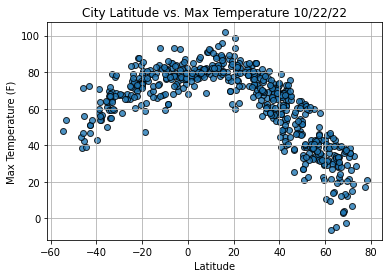

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

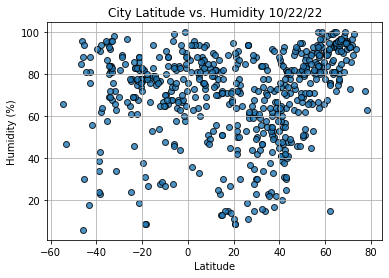

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


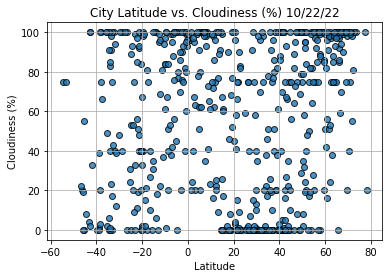

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

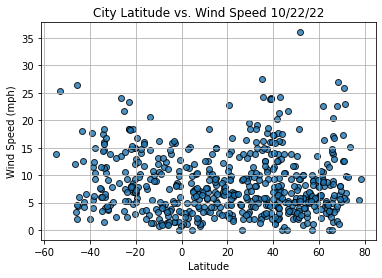

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()